 # This a Test

In [1]:
print("Start")
import ibm_db
import ibm_db_dbi
import pandas
import matplotlib.pyplot as plt

Start


In [2]:
#Enter the values for you database connection
dsn_driver = "IBM DB2 ODBC DRIVER"
dsn_database = "BLUDB" # e.g. "BLUDB"
dsn_hostname = "db2w-seirbtf.us-south.db2w.cloud.ibm.com" # e.g.: "abc.url.example"
dsn_port = "50001"    # e.g. "50000"
dsn_uid = ""     # e.g. "db2_1234"
dsn_pwd = ""     # e.g. "zorglub"

In [3]:
dsn = (
    "DRIVER={{IBM DB2 ODBC DRIVER}};"
    "DATABASE={0};"
    "HOSTNAME={1};"
    "PORT={2};"
    "PROTOCOL=TCPIP;"
    "UID={3};"
    "PWD={4};"
    "Security={{SSL}};").format(dsn_database, dsn_hostname, dsn_port, dsn_uid, dsn_pwd)
#dsn = (DATABASE=BLUDB;HOSTNAME=db2w-seirbtf.us-south.db2w.cloud.ibm.com;PORT=50001;PROTOCOL=TCPIP;UID=bluadmin;PWD=JsE3RRmBHC6d0udG@jjoCa3HsKtsS;Security=SSL;)
dsn = "DATABASE=BLUDB;HOSTNAME=db2w-seirbtf.us-south.db2w.cloud.ibm.com;PORT=50001;PROTOCOL=TCPIP;UID=bluadmin;PWD=JsE3RRmBHC6d0udG@jjoCa3HsKtsS;Security=SSL;"
conn = ibm_db.connect(dsn, "", "")
hdbi = ibm_db_dbi.Connection(conn)

In [7]:
# test query
query = "SELECT * FROM DB2INST1.SNP21;"
# run direct SQL
#stmt = ibm_db.exec_immediate(conn, query)
#ibm_db.fetch_both(stmt)

df = pandas.read_sql(query,hdbi)
df2 = pandas.read_sql(query,hdbi)
#df.info()
#df.hist()


SyntaxError: unexpected EOF while parsing (<ipython-input-7-560c8fc0309c>, line 10)

In [5]:
df

,Date,Time,TS,Group,Location,Temperature,Humidity,Pressure,Comment,TIMESTAMP
0,2020-02-25,10:00:00,1582670000000,snp21,LocationLocation,24.11,1000.12,1000.12,wwwwwwwwwwwwqqqldsflsdjfhsdhfhsdhfwwwwwwwwwwww...,2020-02-25 21:21:15
1,2020-02-25,10:01:00,1582670000000,snp21,Markus SNP,-10.51,1000.12,1000.12,Markus SNPMarkus SNPMarkus SNPMarkus SNPMarkus...,2020-02-25 21:21:15
2,2020-08-12,22:28:54,1582669734515,SNP21,LOC02,53.01,1800.00,2000.00,Test1,NaT
3,2020-08-12,23:57:50,1582675070639,SNP21,LOC02,78.01,1800.00,2000.00,Test1,2020-02-25 23:57:50
4,2020-08-13,00:02:41,1582675361363,SNP21,LOC02,3.01,1800.00,2000.00,Test1,2020-02-26 00:02:41
5,2020-08-13,00:14:13,1582676053304,SNP21,LOC02,64.01,1800.00,2000.00,Test1,2020-02-26 00:14:13
6,2020-08-13,00:15:18,1582676118003,SNP21,LOC02,48.01,1800.00,2000.00,Test1,2020-02-26 00:15:18
7,2020-08-13,00:15:23,1582676123004,SNP21,LOC02,32.01,1800.00,2000.00,Test1,2020-02-26 00:15:23
8,2020-08-13,01:54:50,1582682090696,SNP21,LOC02,0.01,1800.00,2000.00,Test1,2020-02-26 01:54:50
9,2020-08-13,01:54:55,1582682095724,SNP21,LOC02,28.01,1800.00,2000.00,Test1,2020-02-26 01:54:55


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


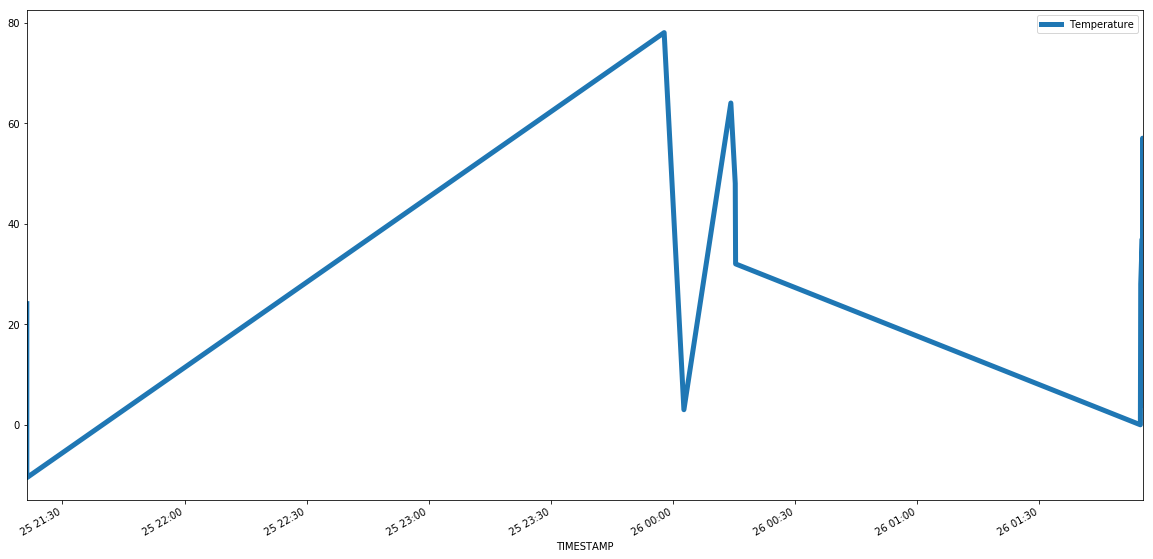

In [6]:
df.month = pandas.to_datetime(df.TIMESTAMP)
df.set_index('TIMESTAMP', inplace=True)
df[['Temperature']].plot(figsize=(20,10), linewidth=5, fontsize=10)
#plt.xlabel('Time', fontsize=10);
#print(df.head)


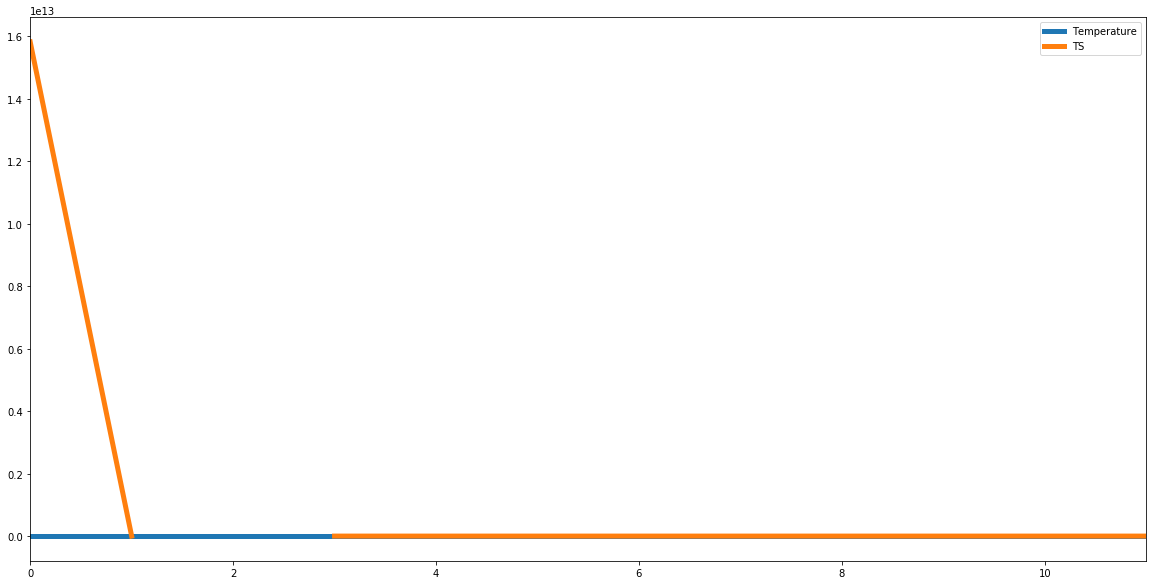

In [80]:


#df2[['Temperature','TS']].plot(figsize=(20,10), linewidth=5, fontsize=10)
# Use kind='hbar' for horizontal bars, and stacked=True to stack the groups
#df2.plot(kind='bar')
#df2.plot(x='TIMESTAMP')

